In [169]:
%load_ext autoreload
%autoreload 2
import os
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
participant_number = 3
frames = face_analyzer.get_video_frames_for_participant(participant_number,num_selected_frames= 20, is_consecutive_frames=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Facial Landmarks

In [170]:
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

# Face

In [171]:

for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

# Smile

In [172]:
import numpy as np


SMOOTH_WINDOW = 5
happiness_buffer = []
def smooth_happiness(happiness_prob):
    if happiness_prob is None:
        return 0 # TODO: change?
    happiness_buffer.append(happiness_prob)
    if len(happiness_buffer) > SMOOTH_WINDOW:
        happiness_buffer.pop(0)
    return np.mean(happiness_buffer)


for i, frame in enumerate(frames):
    face_roi = face_analyzer.get_face_roi_image(frame.image, frame.face, expand_ratio=1.1)
    frame.smile = smooth_happiness(face_analyzer.get_smile_from_frame(face_roi))

# Selected Facial Features

In [173]:
for frame in frames:
    frame.two_landmarks_connectors = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

# Head Pose

In [174]:

texts = []
for frame in frames:
    result = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)
    frame.face_angles = result

# Prosodic Extraction

In [175]:
# from models.prosodic_features import ProsodicFeatures
# from utils.prosody_analyzer import ProsodyAnalyzer


# prosody_analyzer = ProsodyAnalyzer(participant_number)
# prosodic_features: ProsodicFeatures = prosody_analyzer.extract_all_features()

# Feature Storage

In [176]:
# from utils.feature_storage import FeatureStorage

# feature_storage = FeatureStorage()
# feature_storage.save_to_csv(participant_number, prosodic_features)
# print(prosodic_features)

# Display Frames

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


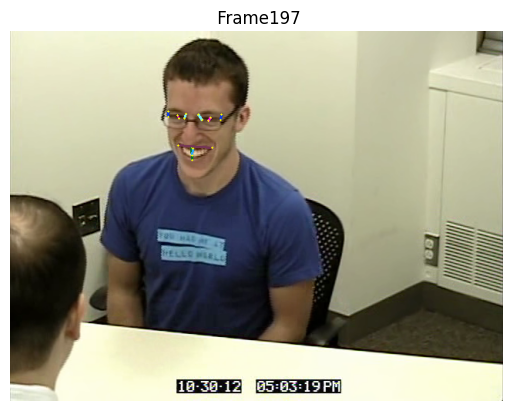

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


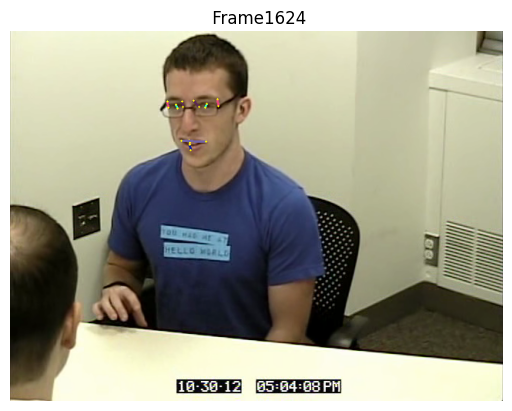

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


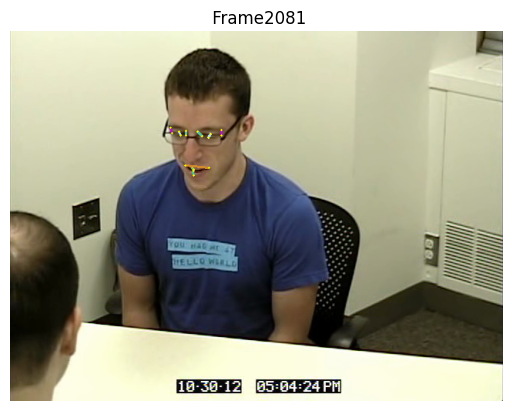

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


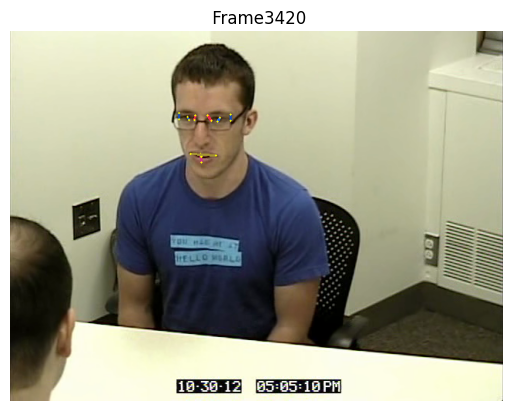

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


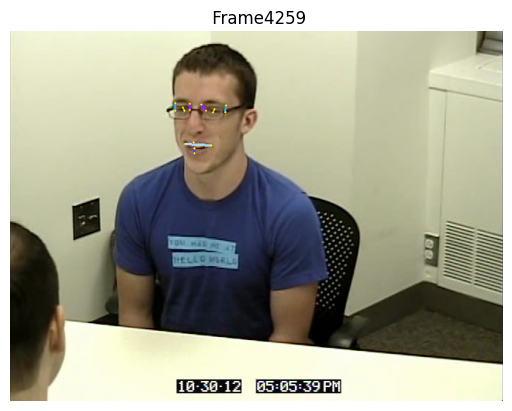

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


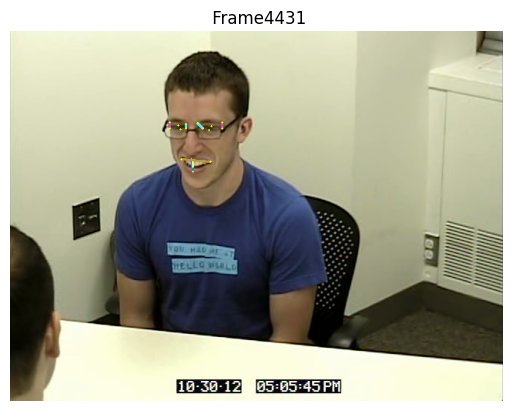

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


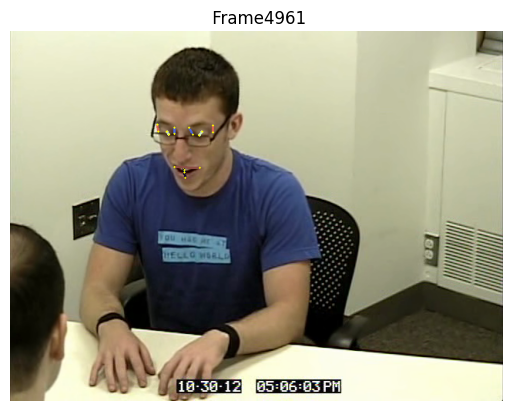

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


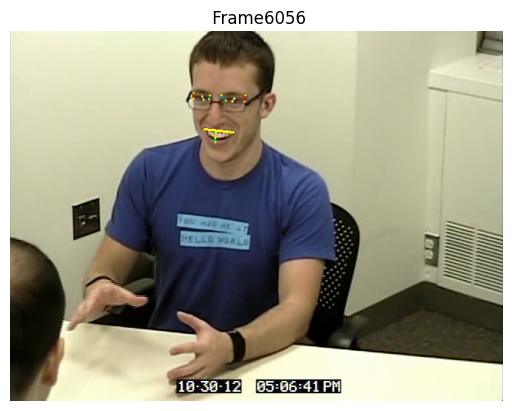

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


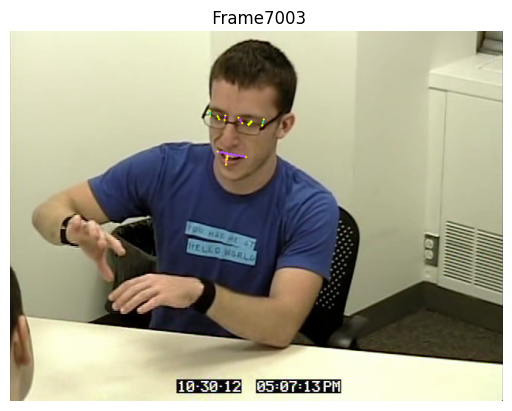

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


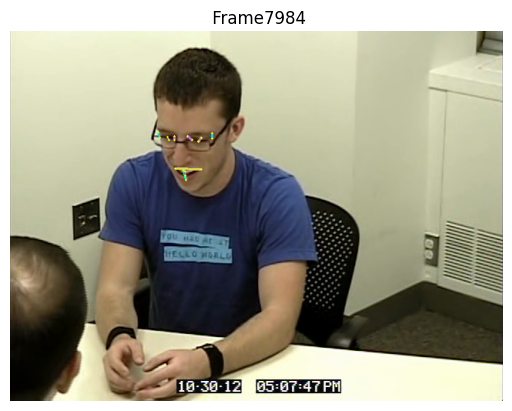

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


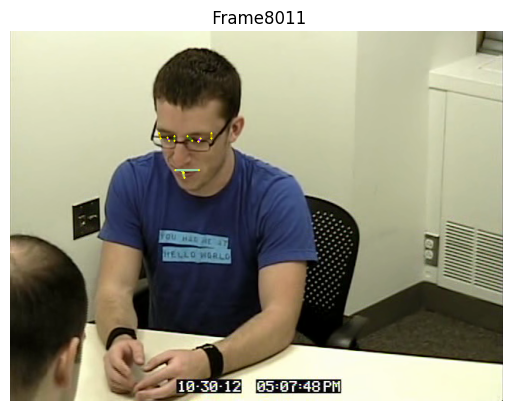

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


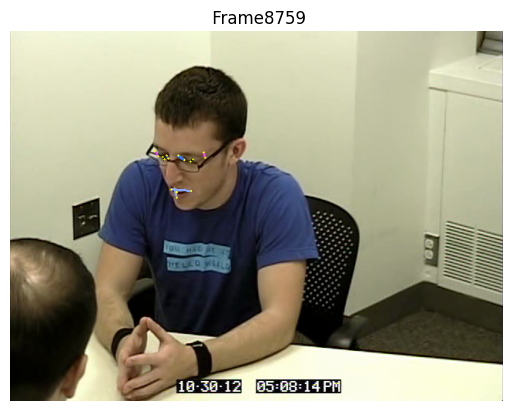

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


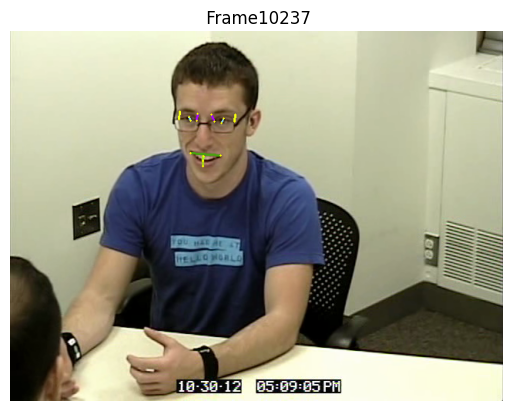

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


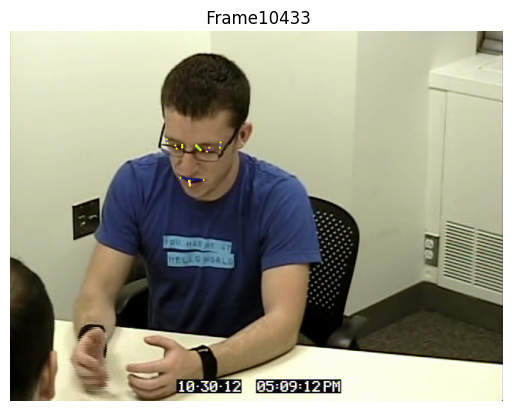

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


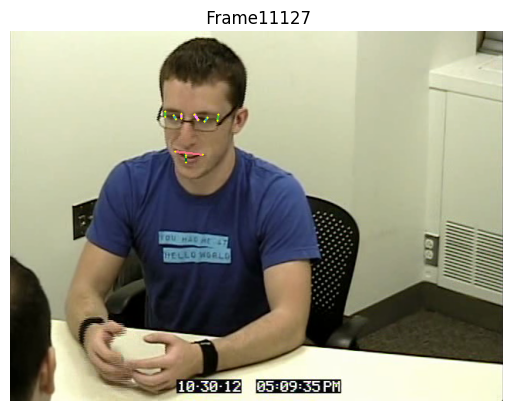

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


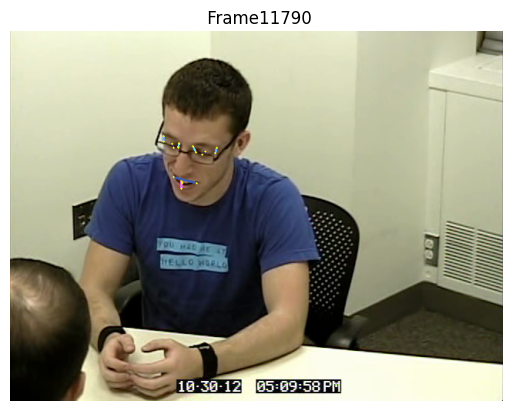

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


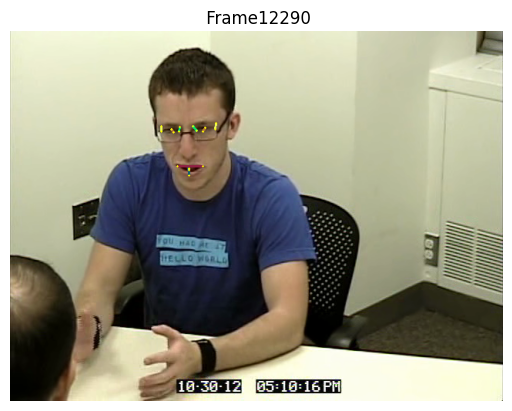

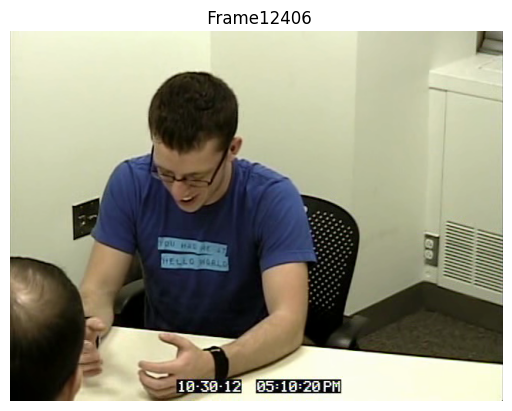

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


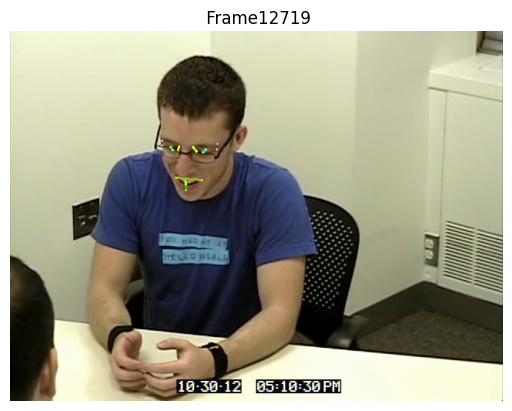

average_outer_brow_height
average_inner_brow_height
eye_open
outer_lip_height
inner_lip_height
lip_corner_distance


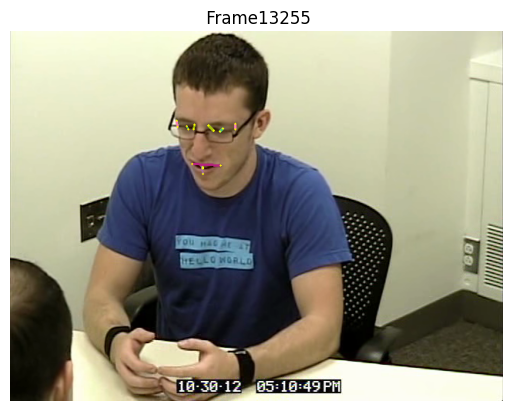

In [177]:
from utils.utils import denormalize_landmarks_without_Z


for frame in frames:
    frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    frame.draw_selected_facial_landmarks(draw_lines=True)

    # frame.put_face_angles()
    # frame.draw_facial_landmarks()
    frame.display()